In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mbuild as mb
from mbuild.lib.recipes.polymer import Polymer

# The basic process for creating a polymer in mBuild

The `Polymer` class exists in mBuild's library of recipes `mbuild/lib/recipes/polymer.py`

In order to create polymers, mbuild Compounds of the monomer(s) and any end groups must first be created, and the necesasry mbuild Ports added to the correct atoms with the desired orientations.  The compounds in mBuild's library contain structures that are essentially ready to go for building polymers. However, the ultimate goal of mBuild's polymer tool is to make it easier to build polymers from nearly any structures that are given to it whether in the form of a file or SMILES string.

There are multiple ways to input the needed information to build a polymer.  When creating a polymer instance, monomer and end group compounds can be directly passed in. This approach can be used when the compounds already contain the needed ports, there will be examples below.

The other, much more flexible, option is to use the `add_monomer` and `add_end_groups` methods on a `Polymer` instnace.


In [2]:
# Quick example of the API and workflow
comp = mb.load('CC', smiles=True) # mBuild compound of the monomer unit
chain = Polymer()

chain.add_monomer(compound=comp,
                  indices=[2, -2],
                  separation=.15,
                  replace=True)

chain.add_end_groups(mb.load('C(=O)O', # Capping off this polymer with Carboxylic acid groups
                     smiles=True,
                     name='acid'), 
                     index=3,
                     separation=0.15)

chain.build(n=7, sequence='A') # After monomers and end groups are added, call the build function
chain.visualize(show_ports=True).show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [3]:
# Doing the same thing, but this time without adding an end group
# Now, the chain is capped with hydrogens (default behavior)

comp = mb.load('CC', smiles=True) # mBuild compound of the monomer unit
chain = Polymer()

chain.add_monomer(compound=comp,
                  indices=[2, -2],
                  separation=.15,
                  replace=True)

chain.build(n=10, sequence='A')
chain.visualize(show_ports=True).show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Flexibility with end groups
- You can only add one end group, while the other is capped off with hydrogen.
- You can add 2 different end groups, labeled by 'head' and 'tail'
- Or you can leave the ends open with an available port

In [4]:
# Creating and adding 2 different end groups.
# The add_end_groups() function has a duplicate parameter (defaulted to True)
# When this is true, calling add_end_group will create 2 of the same compound
# and the polymer is capped off with each.
# If you want different end groups, change Duplicate to False and call the add_end_groups() function twice

comp = mb.load('CC', smiles=True) # mBuild compound of the monomer unit
chain = Polymer()

chain.add_monomer(compound=comp,
                  indices=[2, -2],
                  separation=.15,
                  replace=True)

chain.add_end_groups(mb.load('C(=O)O',smiles=True), # Capping off this polymer with Carboxylic acid groups
                     index=3,
                     separation=0.15,
                     duplicate=False) # Change duplicate to false

chain.add_end_groups(mb.load('N', smiles=True),
                    index=-1, separation=0.13,
                    duplicate=False, label="tail") # label this one tail

chain.build(n=10, sequence='A')
chain.visualize(show_ports=True).show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
# If you only add one end group, you can still have the other end capped off with hydrogen
comp = mb.load('CC', smiles=True) # mBuild compound of the monomer unit
chain = Polymer()

chain.add_monomer(compound=comp,
                  indices=[2, -2],
                  separation=.15)

chain.add_end_groups(mb.load('C(=O)O',smiles=True), # Capping off this polymer with Carboxylic acid groups
                     index=3,
                     separation=0.15,
                     duplicate=False) # Change duplicate to false

chain.build(n=10, sequence='A')
chain.visualize(show_ports=True).show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
#Or to leave the ends of the polymer open with ports, change the add_hydrogens parameter in build() to False
# This would still work when adding only one end group, then leaving the other end open.

comp = mb.load('CC', smiles=True) # mBuild compound of the monomer unit
chain = Polymer()
chain.add_monomer(compound=comp,
                  indices=[2, -2],
                  separation=.15,
                  replace=True)

chain.build(n=10, sequence='A', add_hydrogens=False)
chain.visualize(show_ports=True).show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

##  Here's an example with a more complicated monomer and a little more detail into what's going on  

SMILES strings for Poly-ether-ether-ketone (PEEK)  

One has para linkages, the other has meta  

Goal is to build up a polymer with alternating PARA-META monomers  

Also, just for fun, adding carboxylic acid end groups (ca)

In [7]:
peek_para = mb.load("Oc1ccc(Oc2ccc(C(=O)c3ccccc3)cc2)cc1", smiles=True)
peek_meta = mb.load("Oc1cc(Oc2ccc(C(=O)c3ccccc3)cc2)ccc1", smiles=True)
peek_polymer = Polymer()

peek_polymer.add_monomer(compound=peek_para,
                         indices = [22, 29],
                         separation = 0.1376,
                         replace=True
                        )

peek_polymer.add_monomer(compound=peek_meta,
                         indices = [22, 28],
                         separation = 0.1376,
                         replace=True
                        )

peek_polymer.build(n=3, sequence="AB")
peek_polymer.visualize().show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## A look at what is actually happening with each of the class methods  

The `add_monomer` and `add_end_group` functions are handling the creation of ports.  

The key is in the `bond_indices` and `replace` parameters.
`bond_indices` points to the hydrogen atoms that are occupying the polymer bonding site and 
`replace` says to remove those atoms, and replace them with a port

When the port is created, it defaults to using the orientation that already existed between the hydrogen atom and the atom it was bonded to. 

In [8]:
peek_para = mb.load("Oc1ccc(Oc2ccc(C(=O)c3ccccc3)cc2)cc1",smiles=True)
print('Before passing the compound into add_monomer()')
peek_para.visualize(show_ports=True).show()

peek_polymer = Polymer()

peek_polymer.add_monomer(compound=peek_para,
                         indices = [22, 29],
                         separation = 0.1376,
                         replace=True
                        )
print('After passing the compound into add_monomer()')
peek_polymer.monomers[0].visualize(show_ports=True).show()

Before passing the compound into add_monomer()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

After passing the compound into add_monomer()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
# Same thing with the end group
ca = mb.load('C(=O)O', smiles=True)
print('Before passing the compound into add_end_groups()')
ca.visualize(show_ports=True).show()

peek_polymer.add_end_groups(ca,
                            index=3,
                            separation=0.13,
                            replace=True)

# ca[3] is the hydrogen bonded to the carbon atom

print('After passing the compound into add_end_groups()')
peek_polymer.end_groups[0].visualize(show_ports=True).show()

Before passing the compound into add_end_groups()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

After passing the compound into add_end_groups()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Not using the add_monomer and add_end_group functions
- So far, the examples call these functions everytime to create a polymer, but they are optional
- These functions basically handle the creation of ports.
- If you have a compound where the ports already exist, or you want to add them yourself you can pass them into the polymer class instance, and go straight to the build() function.
- However, you can use both approaches for the same polymer. Passing in compounds when initializing a polymer, and then adding to self.monomers or self.end_groups with the add functions.

In [10]:
from mbuild.lib.moieties.ch2 import CH2

chain = Polymer(monomers=[CH2()])
chain.build(n=10, add_hydrogens=True)
chain.visualize().show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
# You can combine passing in compounds, and using the available 
# add_end_group and add_monomer functions

chain = Polymer(monomers=[CH2()])
chain.add_monomer(mb.load('c1ccccc1', smiles=True), indices=[-1, -4])
chain.add_end_groups(mb.load('C(=O)O',smiles=True), # Capping off this polymer with Carboxylic acid groups
                     index=3,
                     separation=0.15,
                     duplicate=False)
chain.build(n=5,sequence='AB', add_hydrogens=True)
chain.visualize().show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Some more use case examples

- Creating regio-regular backbone
- Creating a poly disperse system


In [12]:
p3ht = mb.load('c1cscc1', smiles=True)
p3ht_flip = mb.load('c1cscc1', smiles=True)
p3ht_flip.rotate(np.pi, [0,0,1])
chain = Polymer()
chain.add_monomer(
    compound=p3ht,
    indices=[6, 7],
    separation=.15,
    replace=True
)
chain.add_monomer(
    compound=p3ht_flip,
    indices=[7, 6],
    separation=.15,
    replace=True
)
chain.build(n=5, sequence='AB')
chain.visualize(show_ports=True).show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [18]:
import random

In [24]:
#Regiorandom
chain = Polymer()
chain.add_monomer(
    compound=p3ht,
    indices=[6, 7],
    separation=.15,
    replace=True
)
chain.add_monomer(
    compound=p3ht_flip,
    indices=[7, 6],
    separation=.15,
    replace=True
)
seq = "".join([random.choice("AB") for i in range(10)])
chain.build(n=1, sequence=seq)
print(seq)
chain.visualize(show_ports=True).show()

AAAAAABBBA


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

#### Initializing a polydisperse system

In [13]:
polymer_lengths = [5, 10, 15, 20, 25, 30]
num_polymers = [3, 5, 6, 5, 3, 2]
polymers = []

ethane = mb.load('CC', smiles=True)

for length in polymer_lengths:
    chain = Polymer()
    chain.add_monomer(
        compound=ethane,
        indices=[2, -2],
        separation=.15,
        replace=True
    )
    
    chain.add_end_groups(
        mb.load('C(=O)O',
        smiles=True,
        name='acid'), 
        index=3,
        separation=0.15
    )
    chain.build(n=length)
    polymers.append(chain)

system = mb.fill_box(polymers, num_polymers, density=50)
system.visualize().show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

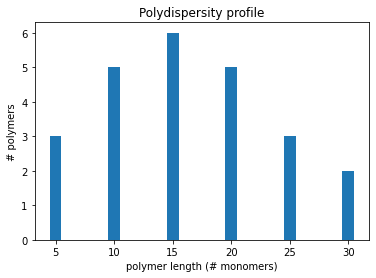

In [14]:
width = 1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(polymer_lengths, num_polymers, width)
ax.set_xlabel("polymer length (# monomers)")
ax.set_ylabel("# polymers")
ax.set_title("Polydispersity profile")
plt.show()

## Using replace=False instead
So far, all of the examples above used `replace=True` and the `bonding_indices` were the indices of hydrgogens that were being replaced by ports and removed to make room for the monomer-monomer bond.

I imagine this would be the most common work-flow for going straight from a SMILES string or compound file to a polymer, but it's possible use `replace=False`.  In this case, the atoms indicated in `bonding_indices` are the atoms forming the monomer-monomer bond.

Below is an example using the `ch2.pdb` file in the `moieties` directory.  In this case, we don't want to replace/remove any hydrogens, but add onto the carbon atom

# Reproducing the alkane chain

### NOTE: 
With the latest changes, this method of building up an alkane isn't really needed, but it still shows the ability to use the add_monomer() and add_end_groups() functions with Replace=False

There currently exists a recipe that produces a simple alkane chain. Below I'll use the new `polymer.py` functionality to re-create the same alkane chain.

In [15]:
ch2 = CH2()
chain = Polymer(monomers=[ch2])
chain.build(n=7, sequence='A')

chain.visualize(show_ports=True).show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [16]:
# It's super easy to throw different end groups on there

chain = Polymer(monomers=[ch2])

chain.add_end_groups(mb.load('c1ccccc1', smiles=True),
                    index=-1,
                    separation=0.15,
                    replace=True)
chain.build(n=8, sequence='A')

chain.visualize().show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol